In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
# from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt
# plt.style.use(['seaborn-darkgrid'])
# plt.rcParams['figure.figsize'] = (12, 9)
# plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

RANDOM_STATE = 17

In [5]:
PATH_TO_SAMSUNG_DATA = "samsung_HAR"
X_train = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA, "samsung_train.txt"))
# os.path.join(PATH_TO_SAMSUNG_DATA, "samsung_train.txt")

In [7]:
X_train

array([[ 0.28858451, -0.02029417, -0.13290514, ..., -0.84124676,
         0.17994061, -0.05862692],
       [ 0.27841883, -0.01641057, -0.12352019, ..., -0.8447876 ,
         0.18028889, -0.05431672],
       [ 0.27965306, -0.01946716, -0.11346169, ..., -0.84893347,
         0.18063731, -0.04911782],
       ...,
       [ 0.27338737, -0.01701062, -0.04502183, ..., -0.77913261,
         0.24914484,  0.04081119],
       [ 0.28965416, -0.01884304, -0.15828059, ..., -0.78518142,
         0.24643223,  0.02533948],
       [ 0.35150347, -0.01242312, -0.20386717, ..., -0.78326693,
         0.24680852,  0.03669484]])

In [11]:
y_train = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA, "samsung_train_labels.txt")).astype(int)
y_train

array([5, 5, 5, ..., 2, 2, 2])

In [12]:
X_test = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA, "samsung_test.txt"))
y_test = np.loadtxt(os.path.join(PATH_TO_SAMSUNG_DATA, "samsung_test_labels.txt")).astype(int)

In [16]:
# Checking dimensions
assert(X_train.shape == (7352, 561) and y_train.shape == (7352,))
assert(X_test.shape == (2947, 561) and y_test.shape == (2947,))

In [18]:
# Since clustering is unsupervised learning, there is no need to do train-test-split. 
#(here we first pretend we dont have label data)

In [34]:
# combine X_train and X_test
X = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])

# feature scaling is an important data preprocessing step for 
# most distance-based machine learning algorithms
# here we Standardization scales
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# There are 561 features. To improve the accuracy of clustering, we will do PCA on X_scaled 
# to reduce the dimentionality of the training data
# that explains 90% variance 
pca = PCA(n_components=0.9, random_state=RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [24]:
X_pca.shape

(10299, 65)

In [32]:
print(f'the first component explains{pca.explained_variance_ratio_[0]*100 : .0f} percent of the data')

the first component explains 51 percent of the data


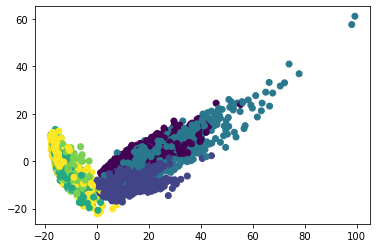

In [40]:
# Visualize the data in the projection on the first two main components.
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.legend;

In [38]:
# Choosing the Appropriate Number of Clusters
# elbow method
# silhouette coefficient